In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

ruta_ratings = './ratings.dat'     # AQUÍ PONER LA RUTA DEL FICHERO
ruta_users = './users.dat'
ruta_movies= './movies.dat' 
    #Sol apartado 1:

from datetime import datetime
dateparse = lambda x: datetime.fromtimestamp(float(x))

valoraciones = pd.read_csv(ruta_ratings, sep = '::', header = None,
                         names = ['user','movie','rating','time'],
                         engine ='python',
                         parse_dates=[3], date_parser=dateparse)
##fuente: http://www.michaeltsmith.org.uk/ipython/Lesson%201,%20%28detour%29%20Python,%20pandas%20and%20Movie%20Ratings%20%28MovieLens%29.html
usuarios = pd.read_csv(ruta_users, sep = '::', header = None,
                         names = ['user','gender','age','occupation','zip'],
                         engine ='python')

peliculas = pd.read_csv(ruta_movies, sep = '::', header = None,
                         names = ['movie','title','genre'],
                         engine ='python')

movielens = pd.merge(pd.merge(valoraciones,usuarios),peliculas)
movielens

,user,movie,rating,time,gender,age,occupation,zip,title,genre
0,1,1193,5,2000-12-31 23:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,2000-12-31 22:33:33,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,2000-12-31 00:49:39,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,2000-12-30 19:01:19,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,2000-12-30 07:41:11,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,2000-12-30 07:02:48,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,2001-02-21 05:48:56,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,2000-12-30 01:38:29,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,2000-12-29 22:26:34,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,2001-01-03 22:36:05,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [35]:
##columna de dataframe sigue indexada, saco values pues
misRatings=movielens.loc[movielens['title']=='X-Men (2000)'].rating
arrayValores=misRatings.values

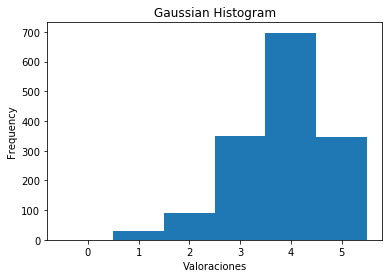

In [47]:
##fuente: https://plot.ly/matplotlib/histograms/
##fuente: https://stackoverflow.com/questions/6986986/bin-size-in-matplotlib-histogram
misBins=bins=range(0, 6 + 1, 1)
plt.hist(arrayValores,bins=misBins,align='left')
plt.title("Gaussian Histogram")
plt.xlabel("Valoraciones")
plt.ylabel("Frequency")
fig = plt.gcf()



In [54]:
mean_ratings = movielens.pivot_table('rating',index=['title'],columns='gender',aggfunc='mean')
temp = movielens.pivot_table('rating',index=['title'],columns='gender',aggfunc='count')
temp[:10]

gender,F,M
title,,
"$1,000,000 Duck (1971)",16.0,21.0
'Night Mother (1986),36.0,34.0
'Til There Was You (1997),37.0,15.0
"'burbs, The (1989)",92.0,211.0
...And Justice for All (1979),35.0,164.0
1-900 (1994),1.0,1.0
10 Things I Hate About You (1999),232.0,468.0
101 Dalmatians (1961),187.0,378.0
101 Dalmatians (1996),150.0,214.0


In [51]:
movielens.pivot_table?